In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr_df = pd.read_csv('data/HR_comma_sep.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr_df.shape

(14999, 10)

In [5]:
hr_df.isnull().sum()#no null records

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
left_df = hr_df[hr_df['left'] == 1]
left_df.shape

(3571, 10)

In [7]:
#these are clusters
#we have to apply classification model to classify data to see if an employee would leave the company or not.
#target variable : left

{'whiskers': [<matplotlib.lines.Line2D at 0x1c42f46e0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42f46e760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c42f454d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42f46ee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42f4791c0>],
 'means': []}

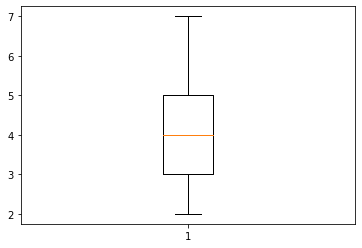

In [8]:
plt.boxplot(hr_df['number_project'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c42fc07e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42fc175b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c42fc07b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42fc17c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42fc17fd0>],
 'means': []}

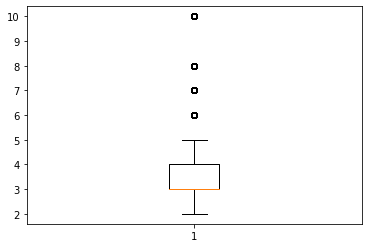

In [9]:
plt.boxplot(hr_df['time_spend_company'])

In [10]:
hr_df[hr_df['time_spend_company']==6].shape

(718, 10)

In [11]:
hr_df[hr_df['time_spend_company']==7].shape

(188, 10)

In [12]:
hr_df[hr_df['time_spend_company']==8].shape

(162, 10)

In [13]:
hr_df[hr_df['time_spend_company']==10].shape

(214, 10)

In [14]:
#too many data as outliers for this column, hence not removing

{'whiskers': [<matplotlib.lines.Line2D at 0x1c42fc844c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42fc84b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c42fc84160>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42fc90280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42fc905e0>],
 'means': []}

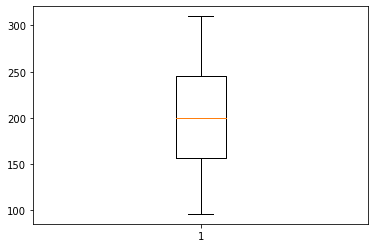

In [15]:
plt.boxplot(hr_df['average_montly_hours'])

In [16]:
hr_df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [17]:
hr_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [18]:
# Using MinMaxScaler of Scikit Learn library for Normalization of features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(hr_df[["average_montly_hours"]])
hr_df["norm_hrs"] = scaled_values
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,norm_hrs
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.285047
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.775701
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.822430
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.593458
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.294393
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0.257009
14995,0.37,0.48,2,160,3,0,1,0,support,low,0.299065
14996,0.37,0.53,2,143,3,0,1,0,support,low,0.219626
14997,0.11,0.96,6,280,4,0,1,0,support,low,0.859813


In [19]:
hr_df = hr_df.drop(['average_montly_hours'],axis=1)
hr_df

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,norm_hrs
0,0.38,0.53,2,3,0,1,0,sales,low,0.285047
1,0.80,0.86,5,6,0,1,0,sales,medium,0.775701
2,0.11,0.88,7,4,0,1,0,sales,medium,0.822430
3,0.72,0.87,5,5,0,1,0,sales,low,0.593458
4,0.37,0.52,2,3,0,1,0,sales,low,0.294393
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,1,0,support,low,0.257009
14995,0.37,0.48,2,3,0,1,0,support,low,0.299065
14996,0.37,0.53,2,3,0,1,0,support,low,0.219626
14997,0.11,0.96,6,4,0,1,0,support,low,0.859813


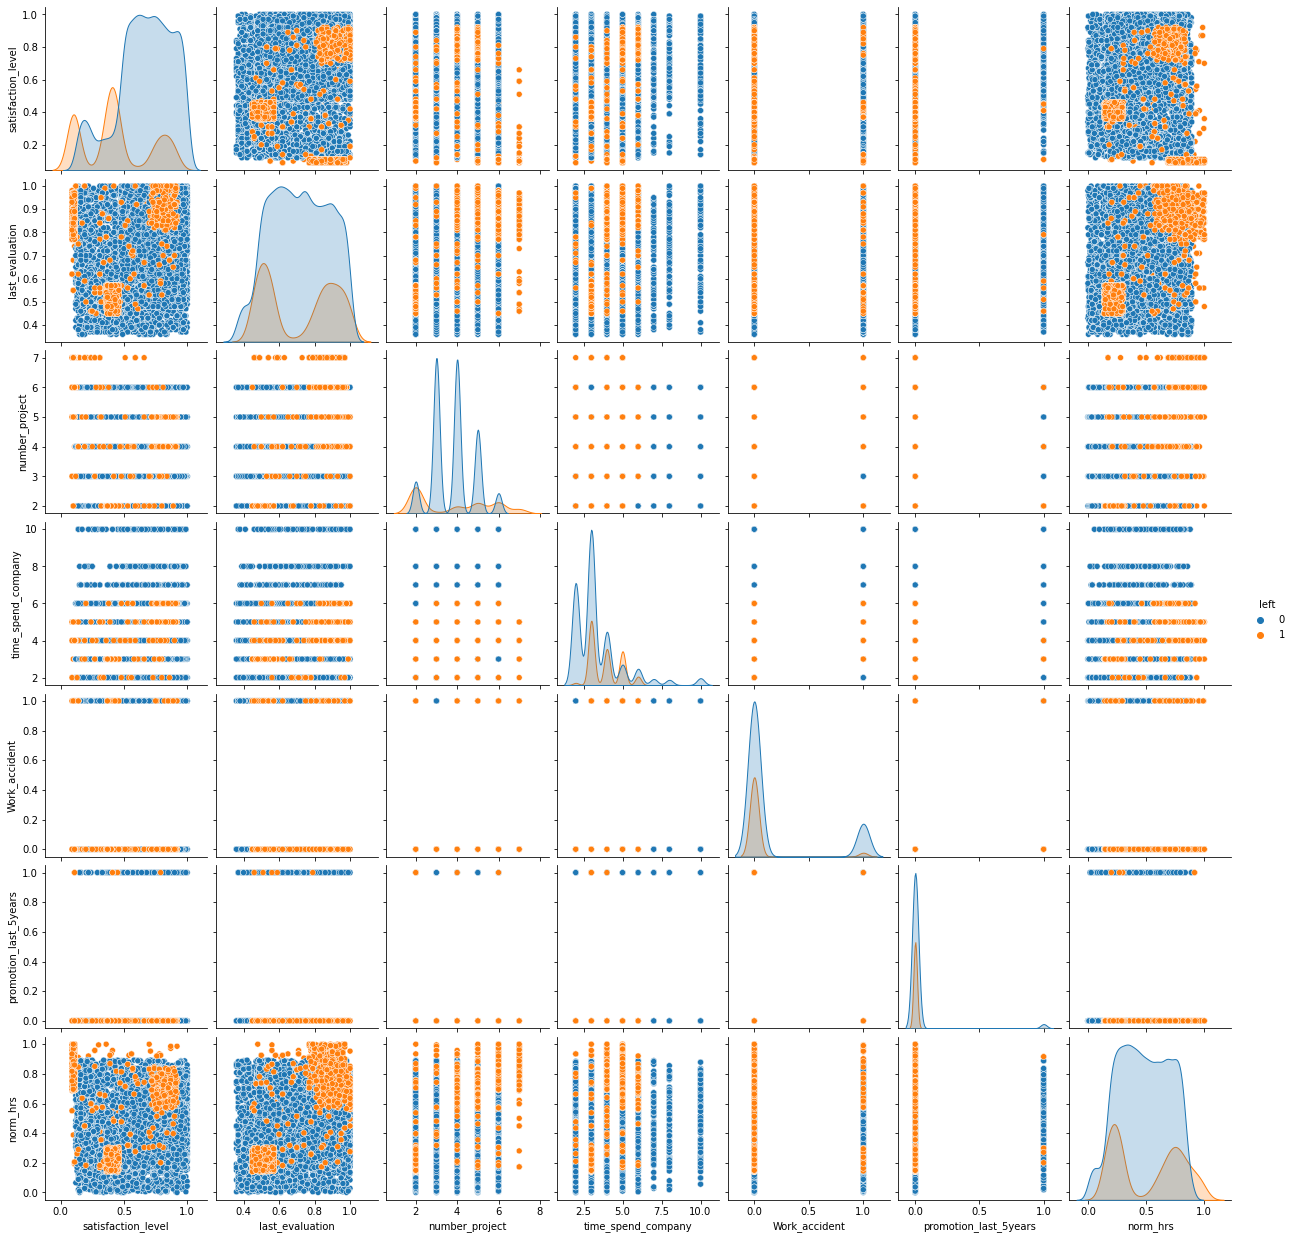

In [20]:
#pairplot
sns.pairplot(hr_df,hue="left")

In [21]:
hr_df1 = pd.get_dummies(hr_df, columns = ['Department', 'salary'])
hr_df1

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,norm_hrs,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,3,0,1,0,0.285047,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,6,0,1,0,0.775701,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,4,0,1,0,0.822430,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,5,0,1,0,0.593458,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,3,0,1,0,0.294393,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,1,0,0.257009,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,3,0,1,0,0.299065,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,3,0,1,0,0.219626,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,4,0,1,0,0.859813,0,0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [23]:
X = hr_df1.drop('left',axis=1)
y = hr_df1['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
#randomforestclassifier

In [25]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [26]:
y_pred1 = rf.predict(X_test)

In [27]:
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy from RandomForestClassifier :", accuracy1)

Accuracy from RandomForestClassifier : 0.989


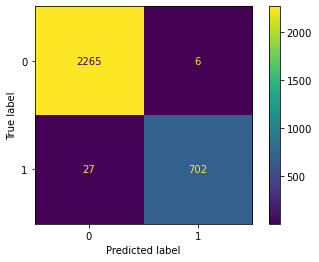

In [28]:
cm1 = confusion_matrix(y_test,y_pred1)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()

In [29]:
precision1 = precision_score(y_test,y_pred1)
print("Precision score from RandomForestClassifier :", precision1)

Precision score from RandomForestClassifier : 0.9915254237288136


In [30]:
recall1 = recall_score(y_test,y_pred1)
print("Recall score from RandomForestClassifier :", recall1)

Recall score from RandomForestClassifier : 0.9629629629629629


In [31]:
mae1 = mean_absolute_error(y_test,y_pred1)
print("Mean absolute error from RandomForestClassifier :", mae1)

Mean absolute error from RandomForestClassifier : 0.011
